In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('data/car-sales-extended-missing-data.csv')
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [3]:
df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [4]:
df.dropna(subset=['Price'],inplace=True)

In [5]:
x=df.drop('Price',axis=1)
y=df['Price']

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [7]:
obj_fet=['Make','Colour']
number_fet=['Odometer (KM)']
door_fet=['Doors']

    
obj_imputer=SimpleImputer(strategy='constant',fill_value='Missing')
number_imputer=SimpleImputer(strategy='mean')
door_imputer=SimpleImputer(strategy='most_frequent')


transformer=ColumnTransformer([
    ('obj_imputer',obj_imputer,obj_fet),
    ('number_imputer',number_imputer,number_fet),
    ('door_imputer',door_imputer,door_fet)
])

modifieddf=transformer.fit_transform(x)

In [8]:
modifiedx=pd.DataFrame(modifieddf,columns=['Make','Colour','Odometer (KM)','Doors'])

In [9]:
modifiedx.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [10]:
y.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [11]:
modifiedx.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

# Make dataFrame as numerical

In [12]:
x.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
dtype: object

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

fet=['Make','Colour','Doors']

one_hot=OneHotEncoder()

transformer=ColumnTransformer([
    ('one_hot',one_hot,fet)
],remainder='passthrough')

x=transformer.fit_transform(modifiedx)

In [14]:
x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

# Fit a model

In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train);

In [17]:
rf.score(x_test,y_test)

0.143832329155007

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train);


In [19]:
clf.score(x_test,y_test)

0.0

In [20]:

df=pd.read_csv('data/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [23]:
x=df.drop('target',axis=1)
y=df['target']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
clf=RandomForestClassifier(n_estimators=100)

In [28]:
clf.fit(x_train,y_train)
clf.score(x_train,y_train),clf.score(x_test,y_test)

(1.0, 0.8524590163934426)

In [29]:
result=clf.predict(x_test)

In [30]:
result

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [31]:
clf.predict_proba(x_test)

array([[0.71, 0.29],
       [0.23, 0.77],
       [0.41, 0.59],
       [0.94, 0.06],
       [0.08, 0.92],
       [0.15, 0.85],
       [0.46, 0.54],
       [0.36, 0.64],
       [0.56, 0.44],
       [0.29, 0.71],
       [0.14, 0.86],
       [0.48, 0.52],
       [0.64, 0.36],
       [0.06, 0.94],
       [0.81, 0.19],
       [0.38, 0.62],
       [0.93, 0.07],
       [0.96, 0.04],
       [0.76, 0.24],
       [0.05, 0.95],
       [0.57, 0.43],
       [0.15, 0.85],
       [0.79, 0.21],
       [0.79, 0.21],
       [0.25, 0.75],
       [0.89, 0.11],
       [0.01, 0.99],
       [0.44, 0.56],
       [0.06, 0.94],
       [0.86, 0.14],
       [0.21, 0.79],
       [0.84, 0.16],
       [0.95, 0.05],
       [0.9 , 0.1 ],
       [0.78, 0.22],
       [0.46, 0.54],
       [0.34, 0.66],
       [0.42, 0.58],
       [0.2 , 0.8 ],
       [0.79, 0.21],
       [0.43, 0.57],
       [0.49, 0.51],
       [0.35, 0.65],
       [0.01, 0.99],
       [0.88, 0.12],
       [0.58, 0.42],
       [0.14, 0.86],
       [0.34,

In [32]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,result)

0.14754098360655737

In [33]:
from sklearn.model_selection import cross_val_score

cval=cross_val_score(clf,x,y,cv=5)

In [34]:
cval

array([0.83606557, 0.8852459 , 0.78688525, 0.81666667, 0.76666667])

In [35]:
np.mean(cval), clf.score(x_test,y_test)

(0.8183060109289617, 0.8524590163934426)

In [36]:

print(f"Model Accuricy {clf.score(x_test,y_test)*100:.2f}%");

Model Accuricy 85.25%


In [37]:
clf.predict_proba(x_test[:5])

array([[0.71, 0.29],
       [0.23, 0.77],
       [0.41, 0.59],
       [0.94, 0.06],
       [0.08, 0.92]])

In [38]:
from sklearn.metrics import roc_curve

y_probs=clf.predict_proba(x_test)
y_probs=y_probs[:, 1]
y_probs

fpr,tpr,thresholds=roc_curve(y_test,y_probs)


In [39]:
def plot_roc_curve(fpr,tpr):
    """
    Plots a Roc Curve 
    take 2 parameter true positive rate tpr, and false positive 
    rate fpr
    """
    
    plt.plot(fpr,tpr,color='orange',label="ROC")
    plt.plot([0,1],[0,1],color='green',linestyle='--',label='Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

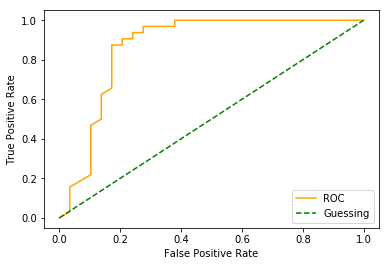

In [40]:
plot_roc_curve(fpr,tpr)

In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_test)

1.0

In [42]:
roc_auc_score(y_test,y_probs)

0.8669181034482758

In [43]:
from sklearn.metrics import confusion_matrix

y_predict=clf.predict(x_test)
confusion_matrix(y_test,y_predict)

array([[23,  6],
       [ 3, 29]], dtype=int64)

In [44]:
pd.crosstab(y_test,y_predict,rownames=['Actual Label'],colnames=['Predicted Label'])

Predicted Label,0,1
Actual Label,,
0,23,6
1,3,29


In [45]:
import seaborn as sns

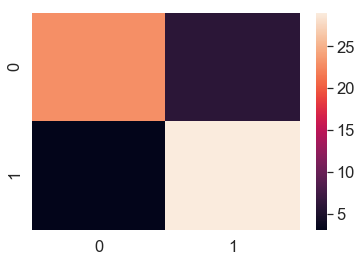

In [46]:
sns.set(font_scale=1.5)

conf=confusion_matrix(y_test,y_predict)

sns.heatmap(conf);

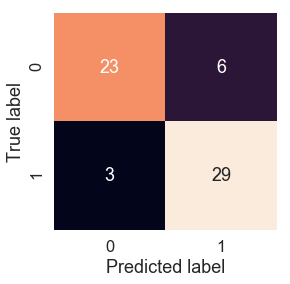

In [47]:
def plot_conf_mat(confm):
    
    fig,ax=plt.subplots(figsize=(4,4))
    ax=sns.heatmap(confm,annot=True,cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

plot_conf_mat(conf)

In [48]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=df.drop('target',axis=1)
y=df['target']

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [50]:
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.924203269641995

In [51]:
from sklearn.metrics import r2_score
r2_score(y_test,model.predict(x_test))

0.5106393318965518

In [52]:
y_test_mean=np.full(len(y_test),y_test.mean())

In [53]:
r2_score(y_test,y_test_mean)

0.0

In [54]:
y_preds=model.predict(x_test)

In [55]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.23754098360655734

In [56]:
np.random.seed(42)
y_preds.mean()

0.4716393442622951

In [57]:
np.array(y_test)


array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [58]:
np.array(y_preds)

array([0.03, 0.58, 0.47, 0.13, 0.81, 0.86, 0.73, 0.03, 0.01, 0.45, 0.95,
       0.21, 0.85, 0.12, 0.89, 0.99, 0.99, 0.05, 0.07, 0.01, 0.6 , 0.05,
       0.88, 0.66, 0.63, 0.52, 0.83, 0.82, 0.06, 0.92, 0.09, 0.02, 0.  ,
       0.27, 0.54, 0.03, 0.39, 0.83, 0.62, 0.97, 0.91, 0.88, 0.95, 0.54,
       0.68, 0.18, 0.75, 1.  , 0.13, 0.  , 0.08, 0.19, 0.89, 0.76, 0.2 ,
       0.06, 0.52, 0.99, 0.03, 0.  , 0.07])

In [59]:
np.random.seed(42)
(y_preds-y_test).mean()

-0.05295081967213115

In [60]:
newdf=pd.DataFrame(data={'actual_value':y_test,
                        'prediction': y_preds})
newdf.head()

,actual_value,prediction
179,0,0.03
228,0,0.58
111,1,0.47
246,0,0.13
60,1,0.81


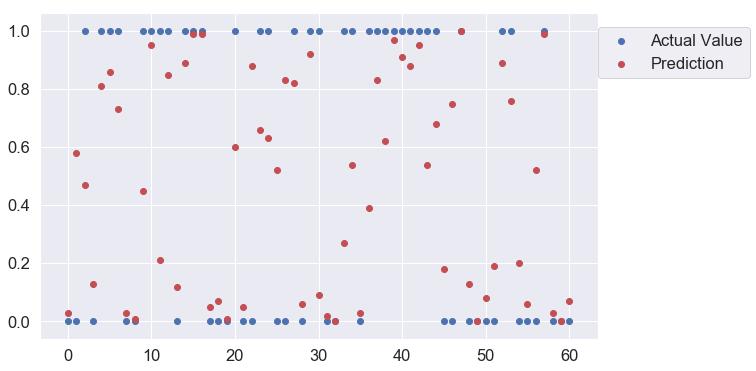

In [61]:
fig,ax=plt.subplots(figsize=(10,6))
x=np.arange(0,len(newdf),1)
ax.scatter(x,newdf['actual_value'],label='Actual Value'); 
ax.scatter(x,newdf['prediction'],c='r',label='Prediction')
ax.legend(loc=(1,0.8))
plt.show();

In [62]:
import pandas as pd
import numpy as np 
heart_disease=pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [64]:
np.random.seed(42)
x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8524590163934426

In [65]:
y_pred=model.predict(x_test)

In [66]:
np.random.seed(42)
cval=cross_val_score(model,x_test,y_pred,cv=5)

In [67]:
cval.mean()

0.9174825174825175

In [68]:
print(f"The cross validated accuracy is: {np.mean(cval)*100:.2f}%")

The cross validated accuracy is: 91.75%


In [69]:
np.random.seed(42)
cval=cross_val_score(model,x_test,y_pred,cv=5,scoring=None)
cval.mean()

0.9174825174825175

In [70]:
np.random.seed(42)
cval=cross_val_score(model,x_test,y_pred,cv=5,scoring='accuracy')
print(f"The cross validated accuracy is: {np.mean(cval)*100:.2f}%")

The cross validated accuracy is: 91.75%


In [71]:
np.random.seed(42)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8524590163934426

In [72]:
np.random.seed(42)
cval=cross_val_score(model,x_test,y_pred,cv=5,scoring='r2')
print(f"The cross validated accuracy is: {np.mean(cval)*100:.2f}%")

The cross validated accuracy is: 66.76%


In [73]:
model.score(x_test,y_test)

0.8524590163934426

In [74]:
np.random.seed(42)
cval=cross_val_score(model,x_test,y_pred,cv=5,scoring='neg_mean_absolute_error')
print(f"The cross validated accuracy is: {np.mean(cval)*100:.2f}%")

The cross validated accuracy is: -8.25%


In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds):.2f}")
print(f"Recall: {recall_score(y_test, y_preds):.2f}")
print(f"F1: {f1_score(y_test, y_preds):.2f}")


cval=cross_val_score(model,x_test,y_pred,cv=5,scoring='f1')
print(f"The cross validated accuracy is: {np.mean(cval)*100:.2f}%")

Classifier metrics on the test set:
Accuracy: 85.25%
Precision: 0.85
Recall: 0.88
F1: 0.86
The cross validated accuracy is: 94.05%


In [105]:
def evaluation_preds(y_true,y_preds):
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    
    dic={
        'accuracy':round(accuracy,2),
        'precision':round(precision,2),
        'recell':round(recall,2),
        'f1':round(f1,2)
    }
    
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recell: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    return dic; 

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
clf=RandomForestClassifier()

heart_disease=df.sample(frac=1)

x=heart_disease.drop('target',axis=1)
y=heart_disease['target']



In [108]:
train_split=round(0.7*len(heart_disease))
train_split

212

In [109]:
valid_split=round(train_split+.15*len(heart_disease))
valid_split

257

In [110]:
x_train=x[:train_split]
y_train=y[:train_split]

x_valid=x[train_split:valid_split]
y_valid=y[train_split:valid_split]

x_test=x[valid_split:]
y_test=y[valid_split:]

In [111]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3


In [112]:
clf.fit(x_train,y_train)
y_preds=clf.predict(x_valid)

C:\Users\Md Hadiuzzaman\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [113]:
baseline_matrix=evaluation_preds(y_valid,y_preds)

Accuracy: 80.00%
Precision: 0.88
Recell: 0.78
F1: 0.82


In [114]:
clf2=RandomForestClassifier(n_estimators=100)
clf2.fit(x_train,y_train)
y_predict2=clf2.predict(x_valid)

matric1=evaluation_preds(y_valid,y_predict2)
matric1

Accuracy: 80.00%
Precision: 0.85
Recell: 0.81
F1: 0.83


{'accuracy': 0.8, 'precision': 0.85, 'recell': 0.81, 'f1': 0.83}

In [116]:
clf2.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# RandomizeSearchCV

In [117]:
grid={"n_estimators":[10,100,200,500,1000,1200],
     "max_depth":[None,5,10,20,30],
     "max_features": ["auto","sqrt"],
     "min_samples_split": [2,4,6],
     "min_samples_leaf": [1,2,4]}

In [118]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split
np.random.seed(42)

x=heart_disease.drop('target',axis=1)
y=heart_disease['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [119]:
clf=RandomForestClassifier(n_jobs=1)



In [125]:
rs_clf=RandomizedSearchCV(estimator=clf,
                         param_distributions=grid,
                         n_iter=10,
                         cv=5,
                         verbose=2)
rs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_sample

[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=5, total=   1.9s
[CV] n_estimators=1000, min_samples_split=6, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   49.1s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [10, 100, 200, 500, 1000, 1200], 'max_depth': [None, 5, 10, 20, 30], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [126]:
rs_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 5}

In [127]:
rs_y_preds=rs_clf.predict(x_test)
rs_mat=evaluation_preds(y_test,rs_y_preds)

Accuracy: 78.69%
Precision: 0.69
Recell: 0.96
F1: 0.81


## GridSearchCV

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
grid2={
    "n_estimators":[1200,1500,2000],
    "max_depth":[None,5,10],
    "max_features":["auto","sqrt"],
    "min_samples_split": [4,6],
    "min_samples_leaf":[1,2]
}

In [134]:
clf=RandomForestClassifier(n_jobs=1)

gs_clf=GridSearchCV(estimator=clf,param_grid=grid2,cv=5)

In [ ]:
gs_clf.fit(x_train,y_train)

In [133]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 1200}